In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

Use the Actigraph activity to show the change in each childs activity based on the baseline, 6 week, and 10 week analysis points
Create graphs comparing
- MVPA (Moderate-to-Vigorous physical activity) over time
- Light physical activity over time
- Sedentary activity over time

Here, we will create a line graph that will show the average of every volunteer's MVPA over bsl, wk06, and wk10 to show the change over time
	- X-Axis are the 3 time points
	- Y-Axis is the score
		- Repeat with Light Physical Activity and Sedentary

In [2]:
data=pd.read_csv("Actigraph.csv")

In [3]:
data

,Vol,Sedentary,Light,Moderate,Vigorous,TimeWorn,Date,Timepoint,MVPA,FileDate,...,bsl_sed,6wk_MVPA,6wk_light,6wk_sed,10wk_MVPA,10wk_light,10wk_sed,bsl_TimeWorn,6wk_TimeWorn,10wk_TimeWorn
0,406-0003,537.0,293,13,4,847.0,4/7/2017,week6,17.0,4/20/2017,...,NaN,18.67,286.50,460.17,NaN,NaN,NaN,NaN,765.33,NaN
1,406-0003,312.0,321,14,1,648.0,4/8/2017,week6,15.0,4/20/2017,...,NaN,18.67,286.50,460.17,NaN,NaN,NaN,NaN,765.33,NaN
2,406-0003,512.0,372,26,2,912.0,4/11/2017,week6,28.0,4/20/2017,...,NaN,18.67,286.50,460.17,NaN,NaN,NaN,NaN,765.33,NaN
3,406-0003,429.0,274,3,1,707.0,4/12/2017,week6,4.0,4/20/2017,...,NaN,18.67,286.50,460.17,NaN,NaN,NaN,NaN,765.33,NaN
4,406-0003,520.0,295,41,3,859.0,4/13/2017,week6,44.0,4/20/2017,...,NaN,18.67,286.50,460.17,NaN,NaN,NaN,NaN,765.33,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,406-0117,367.0,505,16,0,888.0,3/14/2018,week10,16.0,3/23/2018,...,352.71,11.71,472.43,390.57,18.17,455.67,469.67,884.71,874.71,943.5
956,406-0117,535.0,454,19,1,1009.0,3/15/2018,week10,20.0,3/23/2018,...,352.71,11.71,472.43,390.57,18.17,455.67,469.67,884.71,874.71,943.5
957,406-0117,599.0,452,21,1,1073.0,3/17/2018,week10,22.0,3/23/2018,...,352.71,11.71,472.43,390.57,18.17,455.67,469.67,884.71,874.71,943.5
958,406-0117,398.0,469,20,2,889.0,3/20/2018,week10,22.0,3/23/2018,...,352.71,11.71,472.43,390.57,18.17,455.67,469.67,884.71,874.71,943.5


In [6]:
MVPA = data[['Vol', 'TimeWorn', 'Date', 'Timepoint', 'MVPA', 'FileDate', 'autonomy', 'gender', 'Vol', 'bsl_MVPA', '6wk_MVPA', '10wk_MVPA', 'bsl_TimeWorn']]

In [7]:
MVPA

,Vol,TimeWorn,Date,Timepoint,MVPA,FileDate,autonomy,gender,Vol,bsl_MVPA,6wk_MVPA,10wk_MVPA,bsl_TimeWorn
0,406-0003,847.0,4/7/2017,week6,17.0,4/20/2017,low,male,406-0003,NaN,18.67,NaN,NaN
1,406-0003,648.0,4/8/2017,week6,15.0,4/20/2017,low,male,406-0003,NaN,18.67,NaN,NaN
2,406-0003,912.0,4/11/2017,week6,28.0,4/20/2017,low,male,406-0003,NaN,18.67,NaN,NaN
3,406-0003,707.0,4/12/2017,week6,4.0,4/20/2017,low,male,406-0003,NaN,18.67,NaN,NaN
4,406-0003,859.0,4/13/2017,week6,44.0,4/20/2017,low,male,406-0003,NaN,18.67,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,406-0117,888.0,3/14/2018,week10,16.0,3/23/2018,low,male,406-0117,23.71,11.71,18.17,884.71
956,406-0117,1009.0,3/15/2018,week10,20.0,3/23/2018,low,male,406-0117,23.71,11.71,18.17,884.71
957,406-0117,1073.0,3/17/2018,week10,22.0,3/23/2018,low,male,406-0117,23.71,11.71,18.17,884.71
958,406-0117,889.0,3/20/2018,week10,22.0,3/23/2018,low,male,406-0117,23.71,11.71,18.17,884.71


In [12]:
Light = data[['Vol', 'TimeWorn', 'Date', 'Timepoint', 'MVPA', 'FileDate', 'autonomy', 'gender', 'Vol', 'bsl_light', '6wk_light', '10wk_light', '6wk_TimeWorn']]

In [13]:
Light

,Vol,TimeWorn,Date,Timepoint,MVPA,FileDate,autonomy,gender,Vol,bsl_light,6wk_light,10wk_light,6wk_TimeWorn
0,406-0003,847.0,4/7/2017,week6,17.0,4/20/2017,low,male,406-0003,NaN,286.50,NaN,765.33
1,406-0003,648.0,4/8/2017,week6,15.0,4/20/2017,low,male,406-0003,NaN,286.50,NaN,765.33
2,406-0003,912.0,4/11/2017,week6,28.0,4/20/2017,low,male,406-0003,NaN,286.50,NaN,765.33
3,406-0003,707.0,4/12/2017,week6,4.0,4/20/2017,low,male,406-0003,NaN,286.50,NaN,765.33
4,406-0003,859.0,4/13/2017,week6,44.0,4/20/2017,low,male,406-0003,NaN,286.50,NaN,765.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,406-0117,888.0,3/14/2018,week10,16.0,3/23/2018,low,male,406-0117,508.29,472.43,455.67,874.71
956,406-0117,1009.0,3/15/2018,week10,20.0,3/23/2018,low,male,406-0117,508.29,472.43,455.67,874.71
957,406-0117,1073.0,3/17/2018,week10,22.0,3/23/2018,low,male,406-0117,508.29,472.43,455.67,874.71
958,406-0117,889.0,3/20/2018,week10,22.0,3/23/2018,low,male,406-0117,508.29,472.43,455.67,874.71


In [14]:
Sedentary = data[['Vol', 'TimeWorn', 'Date', 'Timepoint', 'MVPA', 'FileDate', 'autonomy', 'gender', 'Vol', 'bsl_sed', '6wk_sed', '10wk_sed', '10wk_TimeWorn']]

In [15]:
Sedentary

,Vol,TimeWorn,Date,Timepoint,MVPA,FileDate,autonomy,gender,Vol,bsl_sed,6wk_sed,10wk_sed,10wk_TimeWorn
0,406-0003,847.0,4/7/2017,week6,17.0,4/20/2017,low,male,406-0003,NaN,460.17,NaN,NaN
1,406-0003,648.0,4/8/2017,week6,15.0,4/20/2017,low,male,406-0003,NaN,460.17,NaN,NaN
2,406-0003,912.0,4/11/2017,week6,28.0,4/20/2017,low,male,406-0003,NaN,460.17,NaN,NaN
3,406-0003,707.0,4/12/2017,week6,4.0,4/20/2017,low,male,406-0003,NaN,460.17,NaN,NaN
4,406-0003,859.0,4/13/2017,week6,44.0,4/20/2017,low,male,406-0003,NaN,460.17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,406-0117,888.0,3/14/2018,week10,16.0,3/23/2018,low,male,406-0117,352.71,390.57,469.67,943.5
956,406-0117,1009.0,3/15/2018,week10,20.0,3/23/2018,low,male,406-0117,352.71,390.57,469.67,943.5
957,406-0117,1073.0,3/17/2018,week10,22.0,3/23/2018,low,male,406-0117,352.71,390.57,469.67,943.5
958,406-0117,889.0,3/20/2018,week10,22.0,3/23/2018,low,male,406-0117,352.71,390.57,469.67,943.5


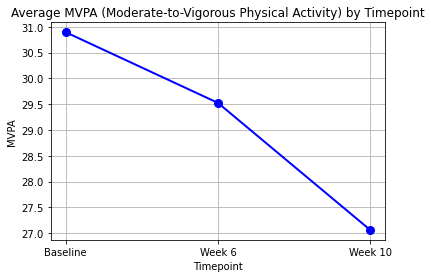

In [22]:
mvpa_data = data[["bsl_MVPA", "6wk_MVPA", "10wk_MVPA"]]

# calculate the mean of each column
means = mvpa_data.mean()

# create a line graph with grid background and dots
plt.plot(means.index, means.values, '-o', color='blue', linewidth=2, markersize=8)
plt.grid(True)

# set x and y labels
plt.xlabel("Timepoint")
plt.ylabel("MVPA")

# set x tick labels
plt.xticks([0, 1, 2], ["Baseline", "Week 6", "Week 10"])

# set title
plt.title("Average MVPA (Moderate-to-Vigorous Physical Activity) by Timepoint")

# show the plot
plt.show()

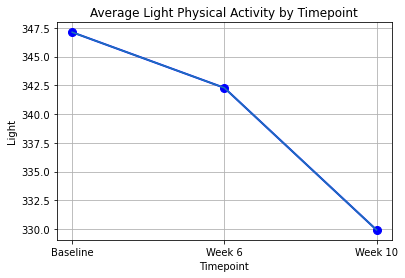

In [23]:
light_data = data[["bsl_light", "6wk_light", "10wk_light"]]

# calculate the mean of each column
means = light_data.mean()

# create a line graph with grid background and dots
plt.plot(means.index, means.values, '-o', color='blue', linewidth=2, markersize=8)
plt.grid(True)

# create a line graph
plt.plot(means.index, means.values)

# set x and y labels
plt.xlabel("Timepoint")
plt.ylabel("Light")

# set x tick labels
plt.xticks([0, 1, 2], ["Baseline", "Week 6", "Week 10"])

# set title
plt.title("Average Light Physical Activity by Timepoint")

# show the plot
plt.show()

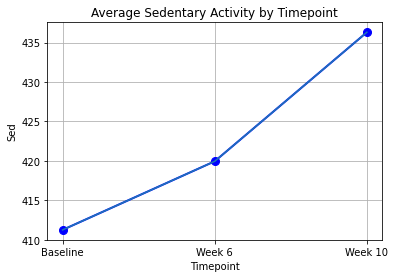

In [24]:
sed_data = data[["bsl_sed", "6wk_sed", "10wk_sed"]]

# calculate the mean of each column
means = sed_data.mean()

# create a line graph with grid background and dots
plt.plot(means.index, means.values, '-o', color='blue', linewidth=2, markersize=8)
plt.grid(True)

# create a line graph
plt.plot(means.index, means.values)

# set x and y labels
plt.xlabel("Timepoint")
plt.ylabel("Sed")

# set x tick labels
plt.xticks([0, 1, 2], ["Baseline", "Week 6", "Week 10"])

# set title
plt.title("Average Sedentary Activity by Timepoint")

# show the plot
plt.show()